In [ ]:
import torch
from utils.attacks import FGSM
from utils.utils.visualize import *
from utils.utils.dataloader import *
from utils.model.resnet import ResNet18
from torchvision.models import resnet18

net = ResNet18()
imgNet = resnet18(pretrained=True)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
fgsm = FGSM(imgNet, device, 0.007)

_, test_loader, _ = cifar10(6, 32)
# _, test_loader, _ = my_imagenet(6, 224)
data = iter(test_loader).next()

from utils.model.comreccnn_3 import ComRecCNN

cnn = ComRecCNN(imgNet, device)
cnn.set_models_path("models/comcnn.pth", "models/reccnn.pth")
cnn.load_models_parameters()

# 4 rows
samples = []
data = iter(test_loader).next()
imgs, lbls = data[0].cuda(), data[1].cuda()
atk_img = fgsm.attack(imgs, lbls)
dfd_img = cnn.defend(imgs)
diff = dfd_img - imgs

imgs = imgs.cpu().detach().numpy()
diff = diff.cpu().detach().numpy()
# atk_img = atk_img.cpu().detach().numpy()
dfd_img = dfd_img.cpu().detach().numpy()
samples.append(imgs)
samples.append(diff)
# samples.append(atk_img)
samples.append(dfd_img)

showBatchTensorImage(samples, lbls)


In [ ]:
import torch
from utils.attacks import BIM
from utils.utils.visualize import *
from utils.utils.dataloader import *
from utils.model.resnet import ResNet18

eps = [0.008, 0.012, 0.016, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1]
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = ResNet18().to(device).eval()
PATH_PARAMETERS = "models/cifar10/resnet.pth"
net.load_state_dict(torch.load(PATH_PARAMETERS))
_, test_loader, _ = cifar10(10)

for e in eps:
    # initialize indicator
    attack_succ = 0
    defend_succ = 0
    total_num = 0
    linf = 0
    # initialize attack method
    fgsm = BIM(net, device, e)

    for img, lbl in test_loader:
        img, lbl = img.to(device), lbl.to(device)
        adv_img = fgsm.attack(img, lbl)
        perturb = adv_img - img
        print(perturb.shape)
        print(np.max(np.abs(perturb.cpu().detach().numpy())))
        # for i in range(100):
        #     linf += LA.norm(perturb[i][0], float('inf'))
        # linf = linf / 100
        break
    print("linf:" + str(linf))


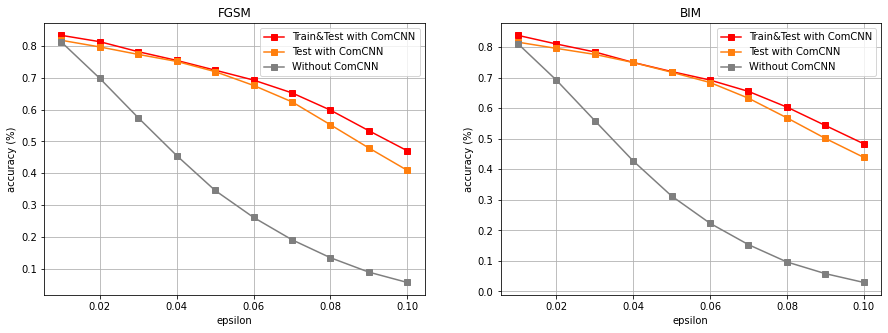

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

labels = ["Train&Test with ComCNN", "Test with ComCNN", "Without ComCNN"]

for i in range(2):
    axes[i].grid()
    if i == 0:
        axes[i].set_title("FGSM")
        x = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  # 点的横坐标
        k1 = [
            0.8329,
            0.813,
            0.7816,
            0.7542,
            0.7236,
            0.6925,
            0.6523,
            0.5982,
            0.5335,
            0.4705,
        ]  # 线1的纵坐标
        k2 = [
            0.8174,
            0.7965,
            0.7731,
            0.7511,
            0.719,
            0.6757,
            0.6242,
            0.5522,
            0.4793,
            0.4091,
        ]  # 线2的纵坐标
        k3 = [
            0.8119,
            0.6978,
            0.5742,
            0.4555,
            0.3459,
            0.2613,
            0.1911,
            0.1347,
            0.0894,
            0.057,
        ]  # 线3的纵坐标
    else:
        axes[i].set_title("BIM")
        x = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]  # 点的横坐标
        k1 = [
            0.838,
            0.8098,
            0.7837,
            0.7493,
            0.7195,
            0.6917,
            0.6546,
            0.6032,
            0.5431,
            0.4832,
        ]  # 线1的纵坐标
        k2 = [
            0.8157,
            0.7954,
            0.7757,
            0.7492,
            0.7173,
            0.6837,
            0.6323,
            0.5681,
            0.5008,
            0.4388,
        ]  # 线2的纵坐标
        k3 = [
            0.8107,
            0.6916,
            0.559,
            0.4271,
            0.3123,
            0.2231,
            0.1532,
            0.0966,
            0.0584,
            0.0296,
        ]  # 线3的纵坐标
    axes[i].plot(x, k1, "s-",color="#ff0000")  # s-:方形
    axes[i].plot(x, k2, "s-",color="#ff7f0e")  # o-:圆形
    axes[i].plot(x, k3, "s-",color="#7f7f7f")  # o-:圆形
    axes[i].set_xlabel("epsilon")  # 横坐标名字
    axes[i].set_ylabel("accuracy (%)")  # 纵坐标名字
    axes[i].legend(labels, loc="best")  # 图例

plt.savefig("fashion_mnist.svg")
plt.show()


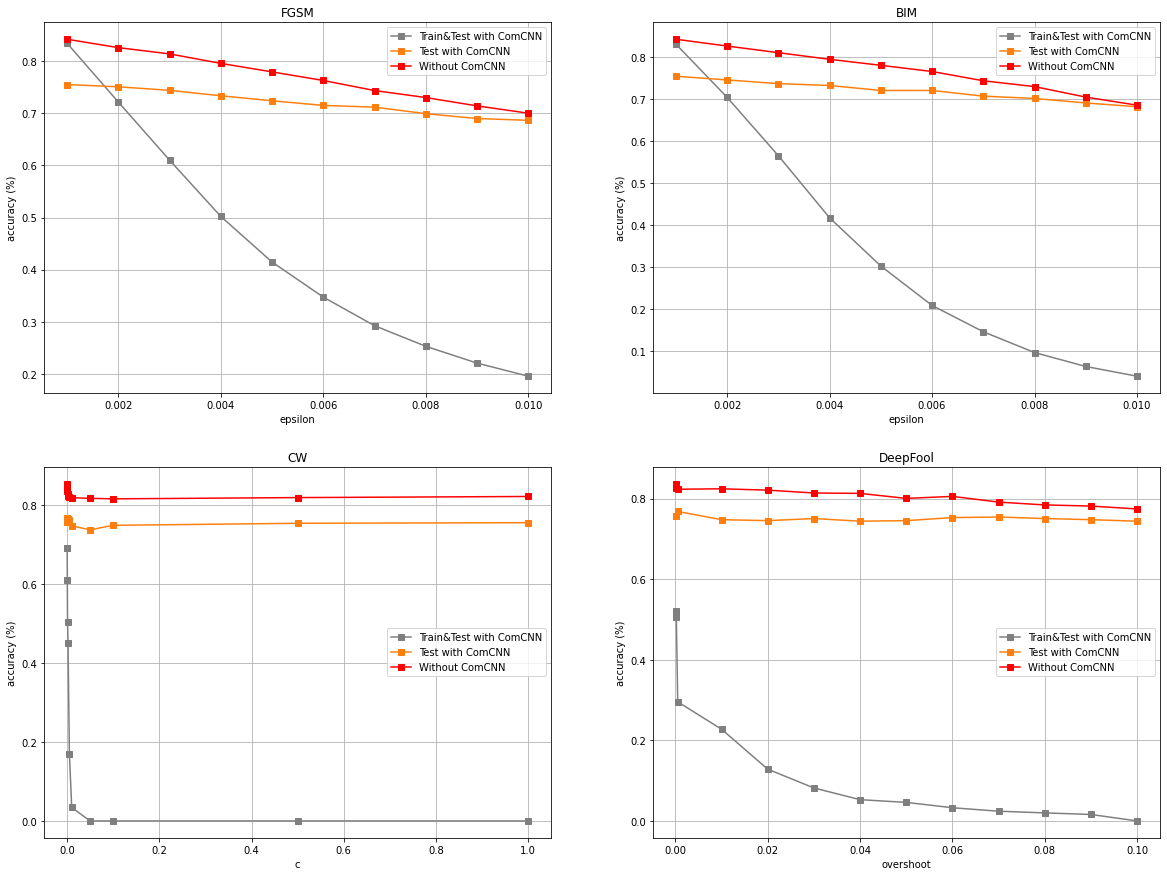

In [1]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

labels = ["Train&Test with ComCNN", "Test with ComCNN", "Without ComCNN"]
cnt = 0
for i in range(2):
    for j in range(2):
        axes[i][j].grid()
        if cnt == 0:
            axes[i][j].set_xlabel("epsilon")  # 横坐标名字
            axes[i][j].set_title("FGSM")
            x = [
                0.001,
                0.002,
                0.003,
                0.004,
                0.005,
                0.006,
                0.007,
                0.008,
                0.009,
                0.01,
            ]  # 点的横坐标
            k1 = [
                0.8341,
                0.7214,
                0.61,
                0.5021,
                0.4146,
                0.3474,
                0.2926,
                0.2531,
                0.2209,
                0.1958,
            ]  # 线1的纵坐标
            k2 = [
                0.755,
                0.7507,
                0.7439,
                0.7335,
                0.7239,
                0.715,
                0.7117,
                0.6992,
                0.6899,
                0.6864,
            ]  # 线2的纵坐标
            k3 = [
                0.8419,
                0.8258,
                0.8138,
                0.7956,
                0.7793,
                0.7628,
                0.7435,
                0.7301,
                0.7141,
                0.7001,
            ]  # 线3的纵坐标
        elif cnt == 1:
            axes[i][j].set_xlabel("epsilon")  # 横坐标名字
            axes[i][j].set_title("BIM")
            x = [
                0.001,
                0.002,
                0.003,
                0.004,
                0.005,
                0.006,
                0.007,
                0.008,
                0.009,
                0.01,
            ]  # 点的横坐标
            k1 = [
                0.8319,
                0.7051,
                0.5661,
                0.4182,
                0.3034,
                0.2095,
                0.1468,
                0.0973,
                0.0641,
                0.041,
            ]  # 线1的纵坐标
            k2 = [
                0.7553,
                0.7465,
                0.7377,
                0.7333,
                0.7215,
                0.7214,
                0.7079,
                0.7024,
                0.6917,
                0.6827,
            ]  # 线2的纵坐标
            k3 = [
                0.8434,
                0.8272,
                0.8114,
                0.7956,
                0.7813,
                0.7666,
                0.7445,
                0.7306,
                0.7056,
                0.6864,
            ]  # 线3的纵坐标
        elif cnt == 2:
            axes[i][j].set_xlabel("c")  # 横坐标名字
            axes[i][j].set_title("CW")
            x = [
                0.0001,
                0.0002,
                0.0005,
                0.001,
                0.002,
                0.005,
                0.01,
                0.05,
                0.1,
                0.5,
                1,
            ]  # 点的横坐标
            k1 = [
                0.6921,
                0.6916,
                0.6104,
                0.5047,
                0.4509,
                0.1709,
                0.0342,
                0.0,
                0.0,
                0.0,
                0.0,
            ]  # 线1的纵坐标
            k2 = [
                0.7614,
                0.7566,
                0.7680,
                0.7657,
                0.7576,
                0.7628,
                0.7476,
                0.7376,
                0.7490,
                0.7542,
                0.7557,
            ]  # 线2的纵坐标
            k3 = [
                0.8537,
                0.8437,
                0.8357,
                0.8273,
                0.8223,
                0.8215,
                0.8189,
                0.8174,
                0.8161,
                0.8193,
                0.8221,
            ]  # 线3的纵坐标
        elif cnt == 3:
            axes[i][j].set_xlabel("overshoot")
            axes[i][j].set_title("DeepFool")
            x = [
                0.0001,
                0.0002,
                0.0005,
                0.01,
                0.02,
                0.03,
                0.04,
                0.05,
                0.06,
                0.07,
                0.08,
                0.09,
                0.1,
            ]  # 点的横坐标
            k1 = [
                0.5204,
                0.5052,
                0.2957,
                0.2276,
                0.1285,
                0.0819,
                0.0528,
                0.0461,
                0.0328,
                0.0242,
                0.02,
                0.0161,
                0.0,
            ]  # 线1的纵坐标
            k2 = [
                0.7576,
                0.7566,
                0.7680,
                0.7476,
                0.7452,
                0.7504,
                0.7438,
                0.7452,
                0.7528,
                0.7542,
                0.7504,
                0.7476,
                0.7438,
            ]  # 线2的纵坐标
            k3 = [
                0.8361,
                0.8262,
                0.8231,
                0.8242,
                0.8209,
                0.8138,
                0.8128,
                0.8004,
                0.8054,
                0.7912,
                0.7842,
                0.7814,
                0.7742,
            ]  # 线3的纵坐标
        axes[i][j].plot(x, k1, "s-",color="#7f7f7f")  # s-:方形
        axes[i][j].plot(x, k2, "s-",color="#ff7f0e")  # o-:圆形
        axes[i][j].plot(x, k3, "s-",color="#ff0000")  # o-:圆形
        axes[i][j].set_ylabel("accuracy (%)")  # 纵坐标名字
        axes[i][j].legend(labels, loc="best")  # 图例
        cnt += 1

plt.savefig("cifar10.svg")
plt.show()
